In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_14/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_14/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_14/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_14/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_14/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_14/pPb_SE_L0_Correlation_GMB_Ratio.root


**root to numpy**

In [2]:
Corrs = ROOT_to_nparray()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [3]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)
#Plot_UB_Subtraction(Corrs)

**Pedestal Subtraction**

ValueError: num must be 1 <= num <= 9, not 10

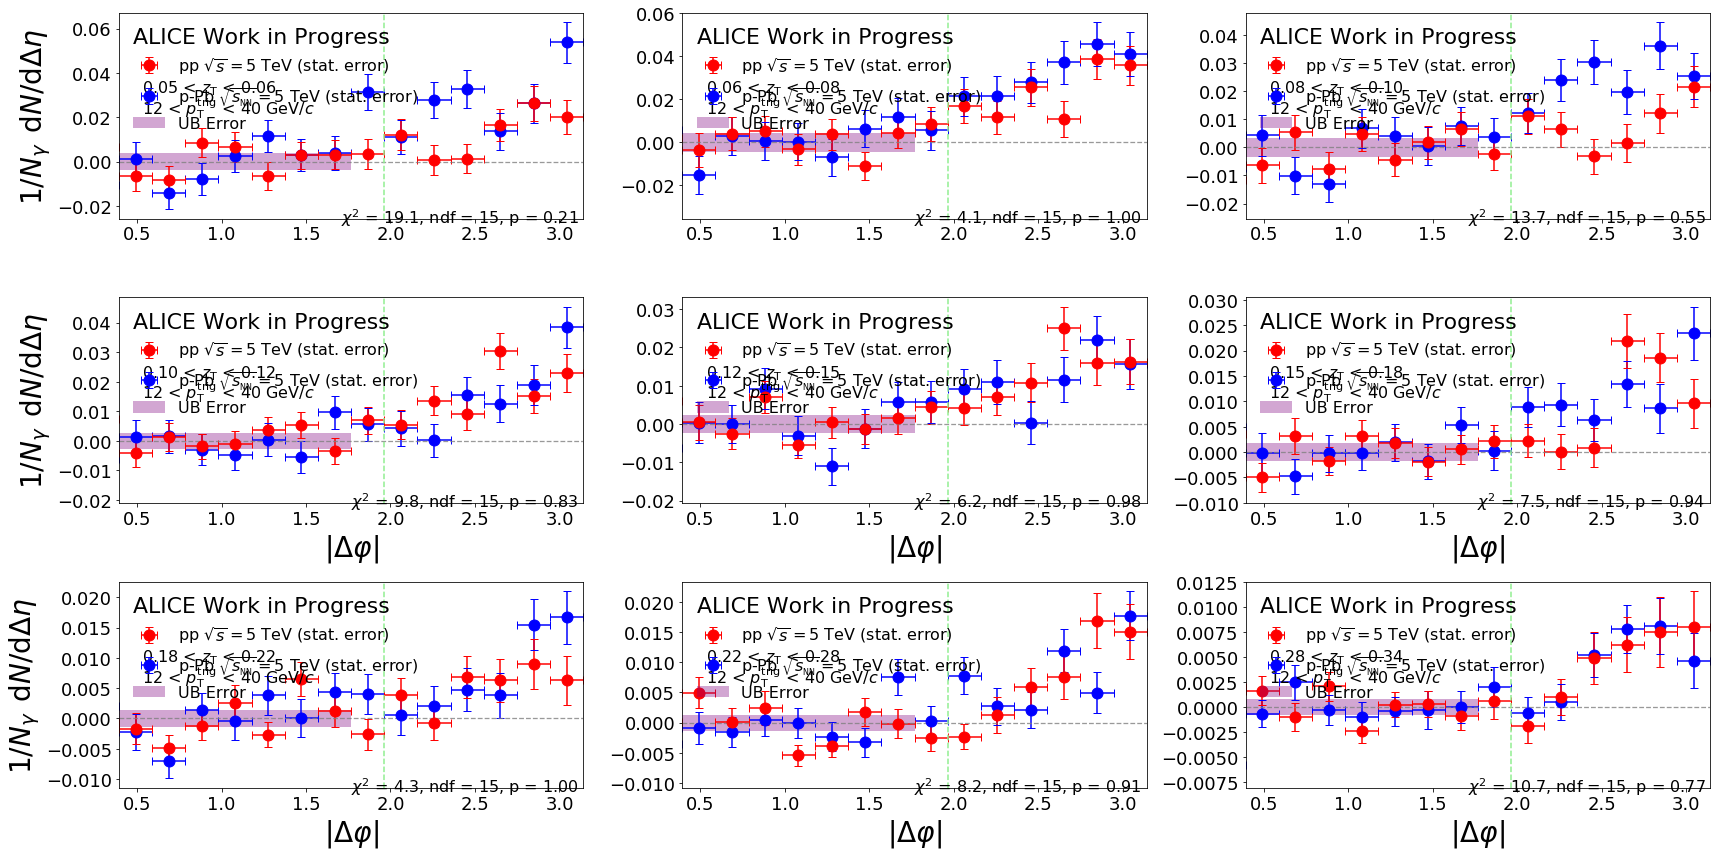

In [4]:
Ped_Sub_After_Cs(Corrs)
#print_from_Dict(Corrs)

Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [ ]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][1])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][1][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][1][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][1][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)

**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [5]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)

In [13]:
Frags = Get_Fragmentation(Corrs)
print(Frags["pp_FF_Errors"])
print(Frags["pp_purity_FF_Errors"])
#print(Frags.keys())

[[1.93756733 1.13114596 0.89441416 0.72280242 0.45015841 0.35599649
  0.21881269 0.14498728 0.10435752 0.06337382 0.03188649 0.02553722
  0.01187378 0.00603746]]
[[0.96175511 0.87363276 0.31025061 0.60498563 0.32999665 0.2224058
  0.0985434  0.09212616 0.05391466 0.03346214 0.01153933 0.00310113
  0.00283128 0.00186388]]


In [7]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_14 Integrating 5\pi/8
pp: p = 2.16, chi2/dof = 2.41
[10.706294253565176, 6.364396220929442, 3.7014009183316516, 2.4010985214382776, 1.5438012735408988, 1.001463780087993, 0.6613815677339941, 0.4087398387987619, 0.2570189248882026, 0.16567852903803668, 0.10239084146756816, 0.06414907132416513, 0.04052837299084408]


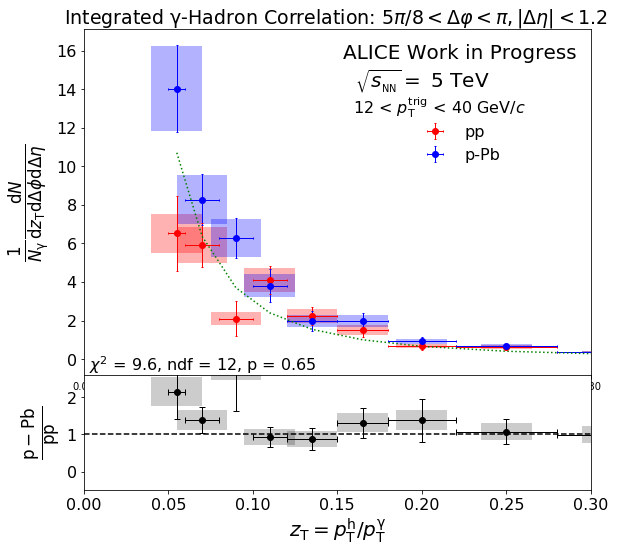

In [8]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
#print_from_Dict(Frags)

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [9]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

###### Compare Different Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)